<a href="https://colab.research.google.com/github/MaximL98/MLCourse/blob/master/Word2VecExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the Gensim library

In [1]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the necessary librarie

In [7]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot

Load the pre-trained Word2Vec model from the file

In [4]:
# Load a pre-trained model
model_path = '/content/drive/My Drive/GoogleNewsvectorsnegative300.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)


Examples of how to use the model

[('cats', 0.8099379539489746), ('dog', 0.760945737361908), ('kitten', 0.7464985251426697), ('feline', 0.7326234579086304), ('beagle', 0.7150582671165466), ('puppy', 0.7075453400611877), ('pup', 0.6934291124343872), ('pet', 0.6891531348228455), ('felines', 0.6755931973457336), ('chihuahua', 0.6709762215614319)]
3 words similar to example
('instance', 0.7873880863189697)
('examples', 0.604103684425354)
('illustration', 0.5342041254043579)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]
('HO_HO_HO', 0.9089415669441223)
Finding Capital of country: (Berlin - Germany) + country
[('cats', 0.6252904534339905)]


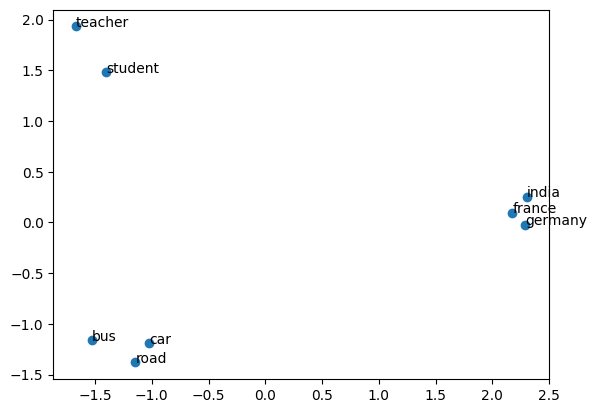

In [25]:
# Find similar words
similar_words = model.most_similar("cat")
print(similar_words)

print("3 words similar to example")
words = model.most_similar("example", topn=3)
for word in words:
  print(word)
print()

# Perform analogy reasoning
result = model.most_similar(positive=['king', 'woman'], negative=['man'])
print(result)

print(model.most_similar_cosmul(positive=["Santa", "oink"], negative=["pig"])[0])

# Finding Capital of a country given Capital of Germany: (Berlin - Germany) + country = 
print("Finding Capital of country: (Berlin - Germany) + country")
capital = model.most_similar(positive=["Berlin", "Russia"], negative=["Germany"], topn=1)
print(capital)


#Visualizing data
words = ["france", "germany", "india", "car", "bus", "road", "teacher", "student"]

X = model[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
